# Group project
## Group number:9
## Project- Credit Card Fraud Detection
## CMPE-255


In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

### Data loading and data analysis
#####  Kaggle dataset is used for this project.
##### https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

In [170]:
cc_data = pd.read_csv('creditcard.csv')
# Display the first 3 rows
print(cc_data.head(3))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]


In [172]:
#print the last three rows
print(cc_data.tail(3))

            Time        V1        V2        V3        V4        V5        V6  \
284804  172788.0  1.919565 -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  172788.0 -0.240440  0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  ...       V21       V22       V23  \
284804 -0.296827  0.708417  0.432454  ...  0.232045  0.578229 -0.037501   
284805 -0.686180  0.679145  0.392087  ...  0.265245  0.800049 -0.163298   
284806  1.577006 -0.414650  0.486180  ...  0.261057  0.643078  0.376777   

             V24       V25       V26       V27       V28  Amount  Class  
284804  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88      0  
284805  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00      0  
284806  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00      0  

[3 rows x 31 columns]


In [174]:
# Check the number of rows and cloumns in the dataset
print(f"Number of rows: {cc_data.shape[0]}")
print(f"Number of columns: {cc_data.shape[1]}")

Number of rows: 284807
Number of columns: 31


In [176]:
print("Columns info:",cc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Counting the number of duplicate rows and checking for missing values
##### Number of duplicate rows is 1081
##### There are no missing values

In [179]:
print("Duplicate rows:", cc_data.duplicated().sum())
print("Missing values:", cc_data.isnull().sum())

Duplicate rows: 1081
Missing values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### Counting the number of fraud and non fraud transactions
#### 0 is non fraud transactions and 1 is the fraud transactions
#### The dataset consists of 284315 non fraud transaction and 492 fraud transactions (imbalanced dataset)

In [182]:
print(cc_data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [184]:
# Comparing the mean of fraud and non-fraud transactions
print(cc_data.groupby('Class').mean())

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30

#### Store fraud transactions in a varaible named fraud and non fraud transactions in a varialbe named non fraud

In [189]:
fraud = cc_data[cc_data.Class== 1]
non_fraud = cc_data[cc_data.Class == 0]

print(fraud.shape)
print(non_fraud.shape)

(492, 31)
(284315, 31)


#### Statistics summary and Visualizion of the data distribution

In [192]:
print(cc_data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [194]:
print(fraud.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [196]:
print(non_fraud.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


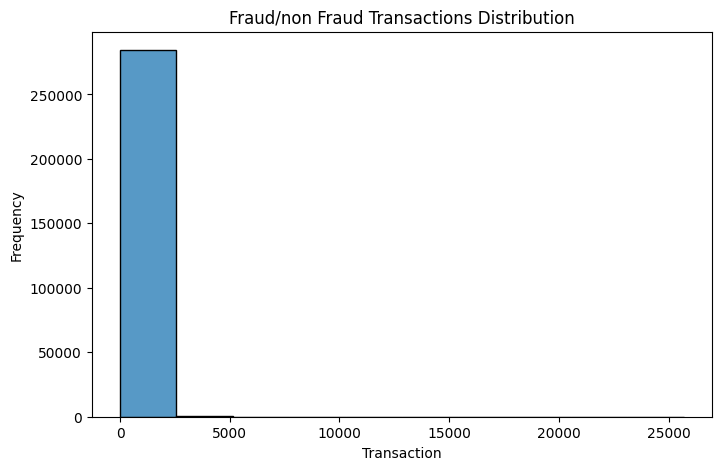

In [198]:
# Histogram of transaction amounts
plt.figure(figsize=(8,5))
sns.histplot(cc_data['Amount'], bins=10)
plt.title("Fraud/non Fraud Transactions Distribution")
plt.xlabel("Transaction")
plt.ylabel("Frequency")
plt.show()

In [200]:
RANDOM_SEED = 42

#### Handling the imbalanced dataset before building the model
#### by oversampling the minority class

In [203]:
from sklearn.utils import resample
fraud = resample(fraud,replace=True, n_samples=284315, random_state=RANDOM_SEED)

print(fraud.shape)
print(non_fraud.shape)

(284315, 31)
(284315, 31)


Shape before preprocess: (284807, 31)
Duplicates: 1081
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


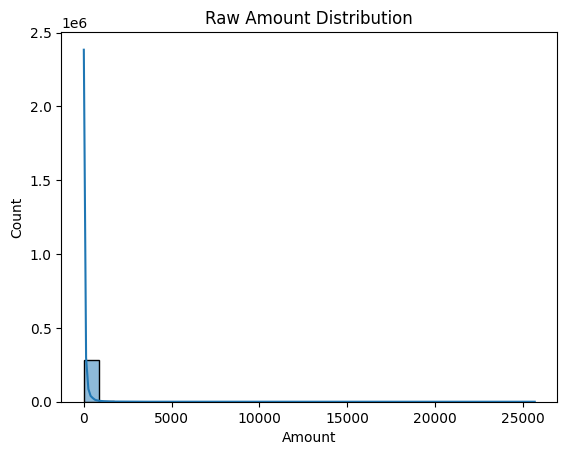

In [205]:
#State before pre-processing
print("Shape before preprocess:", cc_data.shape)
print("Duplicates:", cc_data.duplicated().sum())
print(cc_data['Amount'].describe())
sns.histplot(cc_data['Amount'], bins=30, kde=True)
plt.title("Raw Amount Distribution")
plt.show()

Pre-process data. The importance of 

dropping duplicates: Prevents models from seeing the same example multiple times, ensuring a each row is unique and maintaining representation of transaction diversity

log-transform Amount: Log transform to Amount pulls it in the right tail of large transactions, allowing for more symmetric distribution and easier to models to learn

robust scale Amount: Ensures outliers don't dominate feature space

In [208]:
# Pre-processing: drop duplicates, log‐transform & robust‐scale Amount
from sklearn.preprocessing import RobustScaler
cc_data = cc_data.drop_duplicates()
cc_data['Amount_log'] = np.log1p(cc_data['Amount'])
rs = RobustScaler().fit(cc_data[['Amount_log']])
cc_data['Amount_scaled'] = rs.transform(cc_data[['Amount_log']])

Shape after preprocess: (283726, 33)
count    283726.000000
mean          3.153760
std           1.657080
min           0.000000
25%           1.887070
50%           3.135494
75%           4.363226
max          10.153941
Name: Amount_log, dtype: float64
count    283726.000000
mean          0.007377
std           0.669215
min          -1.266275
25%          -0.504178
50%           0.000000
75%           0.495822
max           2.834412
Name: Amount_scaled, dtype: float64


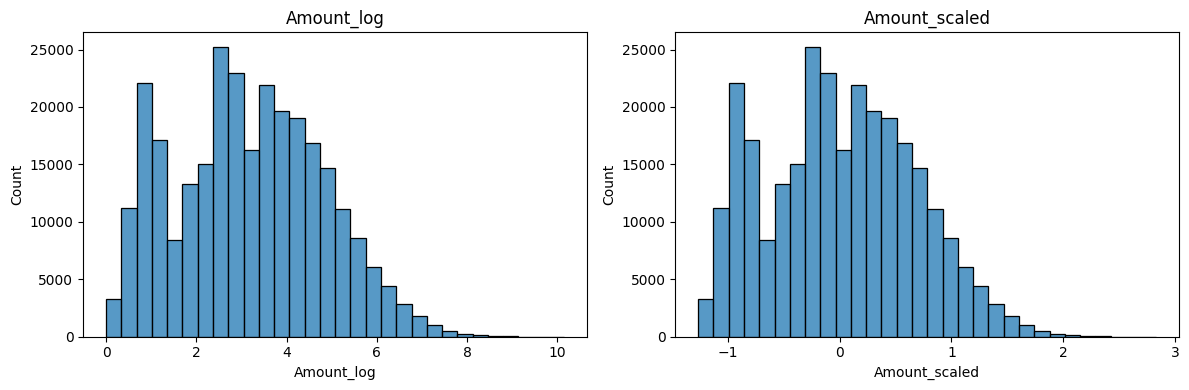

In [210]:
#State after pre-processing
print("Shape after preprocess:", cc_data.shape)
print(cc_data['Amount_log'].describe())
print(cc_data['Amount_scaled'].describe())
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.histplot(cc_data['Amount_log'],    bins=30, ax=axes[0]).set(title="Amount_log")
sns.histplot(cc_data['Amount_scaled'], bins=30, ax=axes[1]).set(title="Amount_scaled")
plt.tight_layout()
plt.show()

#### Create new balanced dataset 
#### the new balanced dataset has 568630 rows (284315 fraud + 284315 non fraud)

In [213]:
new_balanced_dataset = pd.concat([non_fraud, fraud], axis=0)

print(new_balanced_dataset.shape)

(568630, 31)


#### Compare the mean values of fraud and sampling non fraud transactions
#### The mean values for the new dataset has to be close to the mean values of the original dataset

In [216]:
print(cc_data.groupby('Class').mean())

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94835.058093  0.013439 -0.009829  0.012853 -0.010440  0.006769   
1      80450.513742 -4.498280  3.405965 -6.729599  4.472591 -2.957197   

             V6        V7        V8        V9  ...       V22       V23  \
Class                                          ...                       
0      0.001251  0.010447 -0.002448  0.002613  ... -0.000160  0.000360   
1     -1.432518 -5.175912  0.953255 -2.522124  ...  0.086639 -0.096464   

            V24       V25       V26       V27       V28      Amount  \
Class                                                                 
0      0.000393 -0.000301  0.000065  0.001409  0.000418   88.413575   
1     -0.106643  0.040615  0.050456  0.213774  0.078270  123.871860   

       Amount_log  Amount_scaled  
Class                             
0        3.154289       0.007590  
1        2.837549   

##### Before building and training the model, we will split the new balanced dataset into train and test. 
##### X will be all the features from the new dataset and Y will be the target (Class)

In [219]:
print(new_balanced_dataset.head(3))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]


In [221]:
X = new_balanced_dataset.drop(columns='Class', axis=1)
Y = new_balanced_dataset['Class']

print("X:",X)
print("Y:",Y)

X:             Time         V1         V2         V3        V4         V5  \
0            0.0  -1.359807  -0.072781   2.536347  1.378155  -0.338321   
1            0.0   1.191857   0.266151   0.166480  0.448154   0.060018   
2            1.0  -1.358354  -1.340163   1.773209  0.379780  -0.503198   
3            1.0  -0.966272  -0.185226   1.792993 -0.863291  -0.010309   
4            2.0  -1.158233   0.877737   1.548718  0.403034  -0.407193   
...          ...        ...        ...        ...       ...        ...   
229712  146022.0   0.908637   2.849024  -5.647343  6.009415   0.216656   
15781    27219.0 -25.266355  14.323254 -26.823673  6.349248 -18.664251   
251881  155542.0   1.868226   1.363077  -1.994934  4.173516   1.239751   
154234  100924.0 -23.984747  16.697832 -22.209875  9.584969 -16.230439   
281144  169966.0  -3.113832   0.585864  -5.399730  1.817092  -0.840618   

              V6         V7         V8         V9  ...       V20        V21  \
0       0.462388   0.239599  

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=RANDOM_SEED)

In [233]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)

X_train: (454904, 30)
X_test: (113726, 30)


In [253]:
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

y_train: (454904,)
y_test: (113726,)


In [255]:
# Train Logistic Regression and Decision Tree models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# Train models
lr_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=RANDOM_SEED)

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

#Cross validation
cross_validation = cross_val_score(rf_model, X_train_scale, y_train, cv=5, scoring='f1')
print("Cross validation F1 score:", cross_validation)
print("Average F1 score:", np.mean(cross_validation))

lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train_scale, y_train)


#Evaluate models
from sklearn.metrics import classification_report

print("Logistic Regression Report:")
print(classification_report(y_test, lr_model.predict(X_test)))

print("Decision Tree Report:")
print(classification_report(y_test, dt_model.predict(X_test)))

print("Random Forest with Scaling:")
print(classification_report(y_test, rf_model.predict(X_test_scale)))


Cross validation F1 score: [0.99106668 0.99184813 0.99134655 0.99140281 0.99086495]
Average F1 score: 0.991305821263697


C:\Users\shamo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56863
           1       0.97      0.92      0.94     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Decision Tree Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Random Forest with Scaling:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     56863
           1       1.00      0.95      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113

Peform AUPRC: Importance- AUPRC summarizes how the model balances precision (of all flagged transactions, how many truly were fraud) against recall (of all actual frauds, how many you caught) across every possible probability cutoff

Threshold tuning for the F1-score allows for the default decision cutoff of 0.5 to catch more true frauds while keeping false alarms in check.

In [257]:
#AUPRC & Threshold Tuning
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# Get probability scores
y_scores_lr = lr_model.predict_proba(X_test)[:,1]
y_scores_dt = dt_model.predict_proba(X_test)[:,1]
y_scores_rf = rf_model.predict_proba(X_test_scale)[:,1]

#Finding AUPRC
print("Logistic Regression AUPRC = ", average_precision_score(y_test, y_scores_lr).round(3))
print("Decision Tree AUPRC = ", average_precision_score(y_test, y_scores_dt).round(3))
print("Random Forest AUPRC = ",average_precision_score(y_test, y_scores_rf).round(3))

#Find best threshold for F1
#Logistic Regression
precision_lr, recall_lr, thres_lr = precision_recall_curve(y_test, y_scores_lr)
f1_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr)
best_idx_lr = np.nanargmax(f1_lr[:-1])
best_thres_lr, best_f1_lr = thres_lr[best_idx_lr], f1_lr[best_idx_lr]
print(f"Logistic Regression best threshold = {best_thres_lr:.3f}, F1 = {best_f1_lr:.3f}")

#Decision Tree
precision_dt, recall_dt, thres_dt = precision_recall_curve(y_test, y_scores_dt)
f1_dt = 2 * (precision_dt * recall_dt) / (precision_dt + recall_dt)
best_idx_dt = np.nanargmax(f1_dt[:-1])
best_thres_dt, best_f1_dt = thres_dt[best_idx_dt], f1_dt[best_idx_dt]
print(f"Decision Tree best threshold = {best_thres_dt:.3f}, F1 = {best_f1_dt:.3f}")

#Random Forest
precision_rf, recall_rf, thres_rf = precision_recall_curve(y_test, y_scores_rf)
f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
best_idx_rf = np.nanargmax(f1_rf[:-1])
best_thres_rf, best_f1_rf = thres_rf[best_idx_rf], f1_rf[best_idx_rf]
print(f"Random Forest best threshold = {best_thres_rf:.3f}, F1 = {best_f1_rf:.3f}")

#Final reports at best thresholds
y_pred_lr = (y_scores_lr >= best_thres_lr).astype(int)
y_pred_dt = (y_scores_dt >= best_thres_dt).astype(int)
y_pred_rf = (y_scores_rf >= best_thres_rf).astype(int)
print("\nLogistic Regression Report: ")
print(classification_report(y_test, y_pred_lr, digits=4))
print("------------------------------------------------------")

print("Decision Tree Report: ")
print(classification_report(y_test, y_pred_dt, digits=4))
print("------------------------------------------------------")

print("Random Forest Report: ")
print(classification_report(y_test, y_pred_rf, digits=4))
print("------------------------------------------------------")


Logistic Regression AUPRC =  0.988
Decision Tree AUPRC =  0.999
Random Forest AUPRC =  1.0
Logistic Regression best threshold = 0.527, F1 = 0.946
Decision Tree best threshold = 1.000, F1 = 1.000
Random Forest best threshold = 0.181, F1 = 0.991

Logistic Regression Report: 
              precision    recall  f1-score   support

           0     0.9266    0.9726    0.9490     56863
           1     0.9711    0.9230    0.9464     56863

    accuracy                         0.9478    113726
   macro avg     0.9489    0.9478    0.9477    113726
weighted avg     0.9489    0.9478    0.9477    113726

------------------------------------------------------
Decision Tree Report: 
              precision    recall  f1-score   support

           0     1.0000    0.9994    0.9997     56863
           1     0.9994    1.0000    0.9997     56863

    accuracy                         0.9997    113726
   macro avg     0.9997    0.9997    0.9997    113726
weighted avg     0.9997    0.9997    0.9997    11

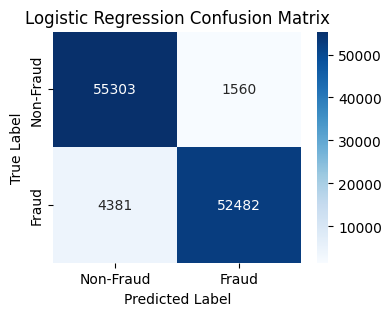

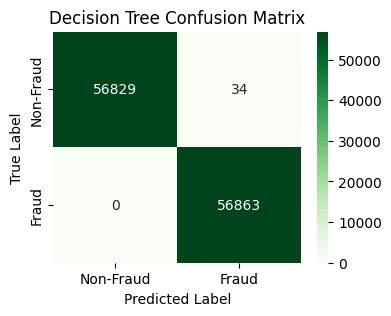

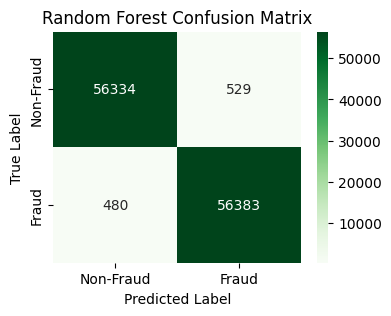

In [262]:
#Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(4,3))
sns.heatmap(
    cm_lr, 
    annot=True, fmt='d', 
    cmap='Blues', 
    xticklabels=['Non-Fraud','Fraud'], 
    yticklabels=['Non-Fraud','Fraud']
)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

#Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(4,3))
sns.heatmap(
    cm_dt, 
    annot=True, fmt='d', 
    cmap='Greens', 
    xticklabels=['Non-Fraud','Fraud'], 
    yticklabels=['Non-Fraud','Fraud']
)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Decision Tree Confusion Matrix')
plt.show()

#Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4,3))
sns.heatmap(
    cm_rf, 
    annot=True, fmt='d', 
    cmap='Greens', 
    xticklabels=['Non-Fraud','Fraud'], 
    yticklabels=['Non-Fraud','Fraud']
)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Random Forest Confusion Matrix')
plt.show()